**Francis O'Hara**

CS 251: Data Analysis and Visualization

# Lab 6a |  K-Nearest Neighbor Classifier

In this lab we will be using the library scikit-learn to train a K-Nearest Neighbor classifier and graph the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import neighbors

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 1: Load and visualize dataset

- Below, load in the datasets (`file_train.csv`, `file_test.csv`). the training set has 800 samples and the test set has 200 samples.
- Create a figure with two subplots showing the train and test data side-by-side.
    - Be sure to label your subplots with informative titles (which datset are we looking at?).
    - Color-code the points based on their class.
    - Set the figure size to make everything clearly legible (not microscopic).

#### Format of data
- Column 1: x coordinate of a 2D point.
- Column 2: y coordinate of a 2D point.
- Column 3: class. Which spiral arm does the point belong to? Labels: [0, 1]

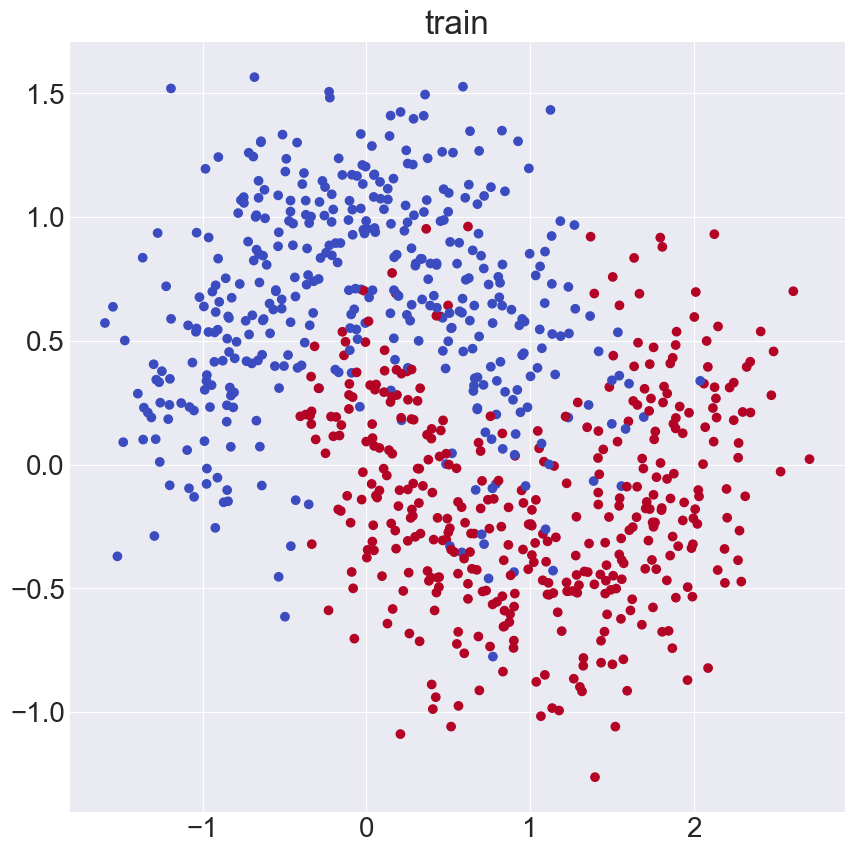

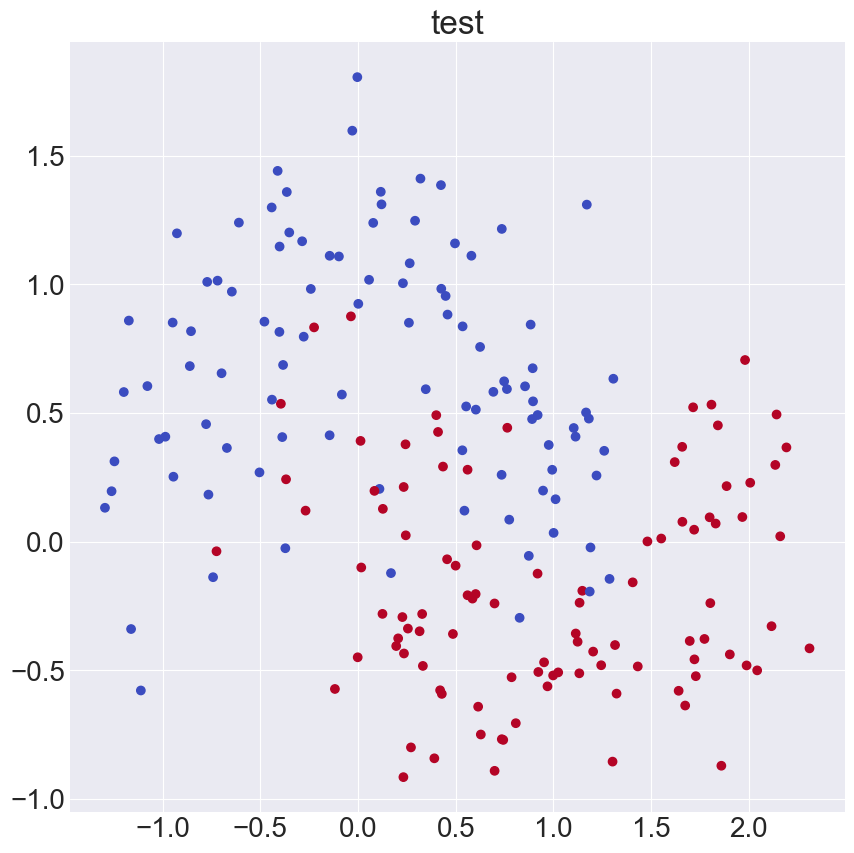

In [18]:
train = pd.read_csv("data/file_train.csv").to_numpy()
test = pd.read_csv("data/file_test.csv").to_numpy()

plt.figure(figsize=(10, 10))
plt.scatter(train[:, 0], train[:, 1], c=train[:, 2], cmap="coolwarm")
plt.title("train")
plt.show()

plt.figure(figsize=(10, 10))
plt.scatter(test[:, 0], test[:, 1], c=test[:, 2], cmap="coolwarm")
plt.title("test")
plt.show()


## Task 2: Predict dataset and graph results

1. Create a [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) [(More Info)](https://scikit-learn.org/stable/modules/neighbors.html#classification).  Set `n_neighbors` equal to 10.
2. Use the fit method with the coordinate columns of the training dataset as X and the class column as the target.
3. Calculate the accuracy of the classifier with the test data using the score method.
4. Print the accuracy of the classifier.
    

In [22]:
knn = neighbors.KNeighborsClassifier(10)
knn.fit(train[:, 0:2], train[:, 2])
accuracy = knn.score(test[:, :2], test[:, 2])
print(f"{accuracy=}")

print("Your accuracy should be 0.92")

accuracy=0.9195979899497487
Your accuracy should be 0.92


## Task 3: Visualize class boundaries

Visualize how different regions of the (2D) dataspace would be classified based on the results of the trained KNN Classifier from Task 2.

### 3a. Meshgrid

Create a meshgrid for predicting values. This is a collection of evenly spaced `(x, y)` values that sample a rectangular region of space.

1. Use [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to make an 1D ndarray of evenly spaced values, one for your x variable, one for your y variable.
   1. Set the start argument to the min value of your column -.5
   2. Set the end argument to the max value of your column +.5
   3. Set the number of samples to 300
 2. Assign `x_samples` and `y_samples` to [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) with the evenly spaced values as the arguments for x1 and x2. Both `x_samples` and `y_samples` should have shape `(300, 300)` (i.e. the x and y values on the 2D 300x300 grid). 
    1. [Flatten](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.flatten.html)`x_samples` and `y_samples` and save into new variables.
    2. Reshape each of the flattened x_samples and y_samples to shape `(N, 1)` then [stack them](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html#numpy.hstack) to create an `(N, 2)` ndarray.

### 3b. Compute KNN predictions

Use your coordinate pairs as predict inputs for the knn classifier you created in Task 2. Reshape the results to the same shape as `x_samples` `(300, 300)`. These are the KNN predictions at every (x, y) sample point on the grid.

### 3c. Plot the KNN predictions

In 1 plot, graph your results. The goal is to color every portion of the `x`-`y` plane within the region of possible data values one of two colors: one color if KNN predicts class 0 at (`x_samples`, `y_samples`), the other color if KNN predicts class 1. This plot resembles two paints poured out from two buckets covering every location on the `x`-`y` plane. You will then superimpose a scatterplot of the original data samples on the colored space.
    
1. Use [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) to plot a heatmap showing the KNN predictions at every point in the 2D grid. You should plug in three ndarrays and each should have shape `(300, 300)`.
2. We need to specify a colormap to have [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) color `x`-`y` plane with two colors. The problem is that none of the built-in colormaps have exactly the two colors we want, so we need to create a custom colormap. A [ListedColormap](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html) object represents a custom colormap that can be passed into the `cmap` keyword argument of pcolormesh. Create two [(example)](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html):
     1. One should have 2 light colors [colors](https://matplotlib.org/stable/gallery/color/named_colors.html). These will be your "paint colors" for the predicted class at every (`x`, `y`) coordinate.
     2. One should have dark versions of the same 2 [colors](https://matplotlib.org/stable/gallery/color/named_colors.html). These will be your colors for the original data samples superimposed.
 3. In your [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) call, set the `cmap` to the light custom colormap that you created.
 4. Superimpose the training samples with using a scatter plot colored based on the int-coded training class labels, but for the actual colors use the dark value colormap. You will need to set both the `c` and `cmap` keyword arguments of `scatter`.
 5. Title your plot and label the axis.

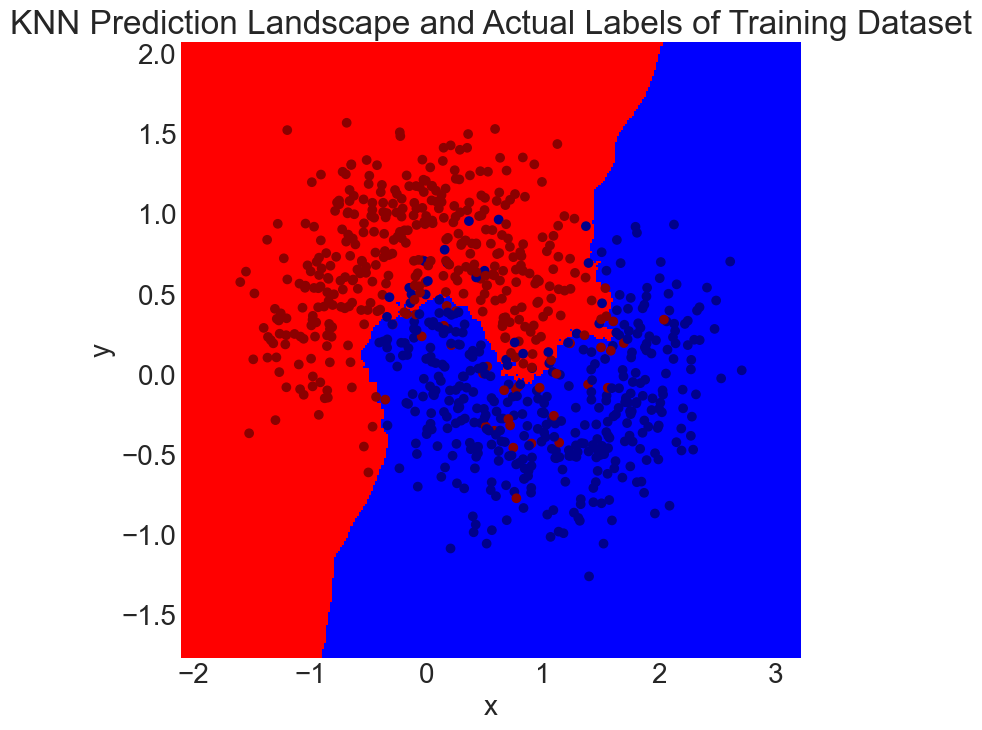

In [37]:
x = np.linspace(start=train[:, 0].min() - 0.5, stop=train[:, 0].max() + 0.5, num=300)
y = np.linspace(start=train[:, 1].min() - 0.5, stop=train[:, 1].max() + 0.5, num=300)

x_samples, y_samples = np.meshgrid(x, y)
x_flattened = x_samples.flatten()
y_flattened = y_samples.flatten()
pred_input = np.hstack((x_flattened.reshape((x_flattened.shape[0], 1)), y_flattened.reshape((y_flattened.shape[0], 1))))

output = knn.predict(pred_input).reshape((300, 300))

plt.figure(figsize=(8, 8))
plt.pcolormesh(x_samples, y_samples, output, cmap=ListedColormap(["red", "blue"]))
plt.title("KNN Prediction Landscape (light colormap)")
plt.scatter(train[:, 0], train[:, 1], c=train[:, 2], cmap=ListedColormap(["darkred", "darkblue"]))
plt.title("KNN Prediction Landscape and Actual Labels of Training Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()